In [68]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [88]:
DATA_DIR = Path('./data')
SAMPLE_RATE = 22050
AUDIO_FILES = list(DATA_DIR.glob('*.wav'))

sample_file = AUDIO_FILES[3]
print(f"\n{sample_file.name}")
y, sr = librosa.load(sample_file, sr=SAMPLE_RATE, duration=None)
print(f"Audio duration: {len(y)/sr:.2f} seconds")
print(f"Sample rate: {sr} Hz")
print(f"Audio shape: {y.shape}")


whale.wav
Audio duration: 90.83 seconds
Sample rate: 22050 Hz
Audio shape: (2002715,)


In [97]:
# Define different parameter sets for comparison
mel_params = {
    'basic': {
        'n_mels': 128,
        'n_fft': 2048,
        'hop_length': 512,
        'fmin': 0,
        'fmax': None
    },
    'high_resolution': {
        'n_mels': 256,
        'n_fft': 4096,
        'hop_length': 256,
        'fmin': 0,
        'fmax': None
    },
    'low_resolution': {
        'n_mels': 64,
        'n_fft': 1024,
        'hop_length': 1024,
        'fmin': 0,
        'fmax': None
    },
    'speech_focused': {
        'n_mels': 128,
        'n_fft': 2048,
        'hop_length': 512,
        'fmin': 80,
        'fmax': 8000
    }
}


In [99]:
def compute_mel_spectrogram(audio, sr, **params):
    """Compute MEL spectrogram with given parameters"""
    mel_spec = librosa.feature.melspectrogram(
        y=audio, 
        sr=sr,
        **params
    )
    # Convert to dB scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# Compute spectrograms for all parameter sets
spectrograms = {}
for name, params in mel_params.items():
    spectrograms[name] = compute_mel_spectrogram(y, sr, **params)
    print(f"  Shape: {spectrograms[name].shape}")

  Shape: (128, 3912)
  Shape: (256, 7824)
  Shape: (64, 1956)
  Shape: (128, 3912)


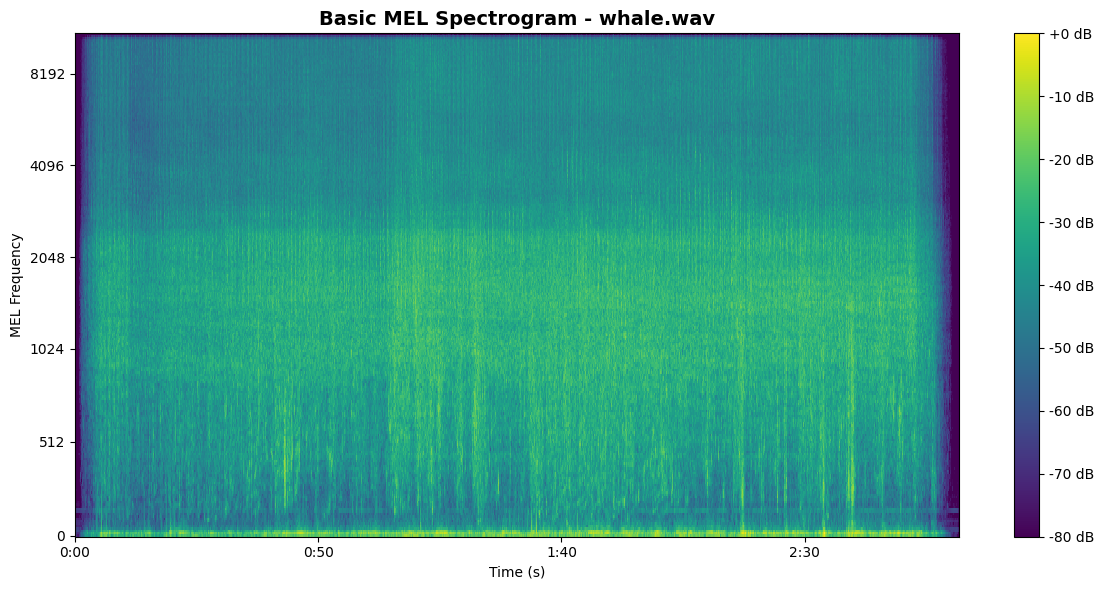

In [100]:
def plot_mel_spectrogram(mel_spec_db, sr, hop_length, title, ax=None):
    """Plot a MEL spectrogram"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    img = librosa.display.specshow(
        mel_spec_db,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='mel',
        ax=ax,
        cmap='viridis'
    )
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('MEL Frequency')
    
    return img

# Test with one spectrogram
fig, ax = plt.subplots(figsize=(12, 6))
img = plot_mel_spectrogram(
    spectrograms['high_resolution'], 
    sr, 
    mel_params['basic']['hop_length'],
    f"Basic MEL Spectrogram - {sample_file.name}",
    ax
)
plt.colorbar(img, ax=ax, format='%+2.0f dB')
plt.tight_layout()
plt.show()

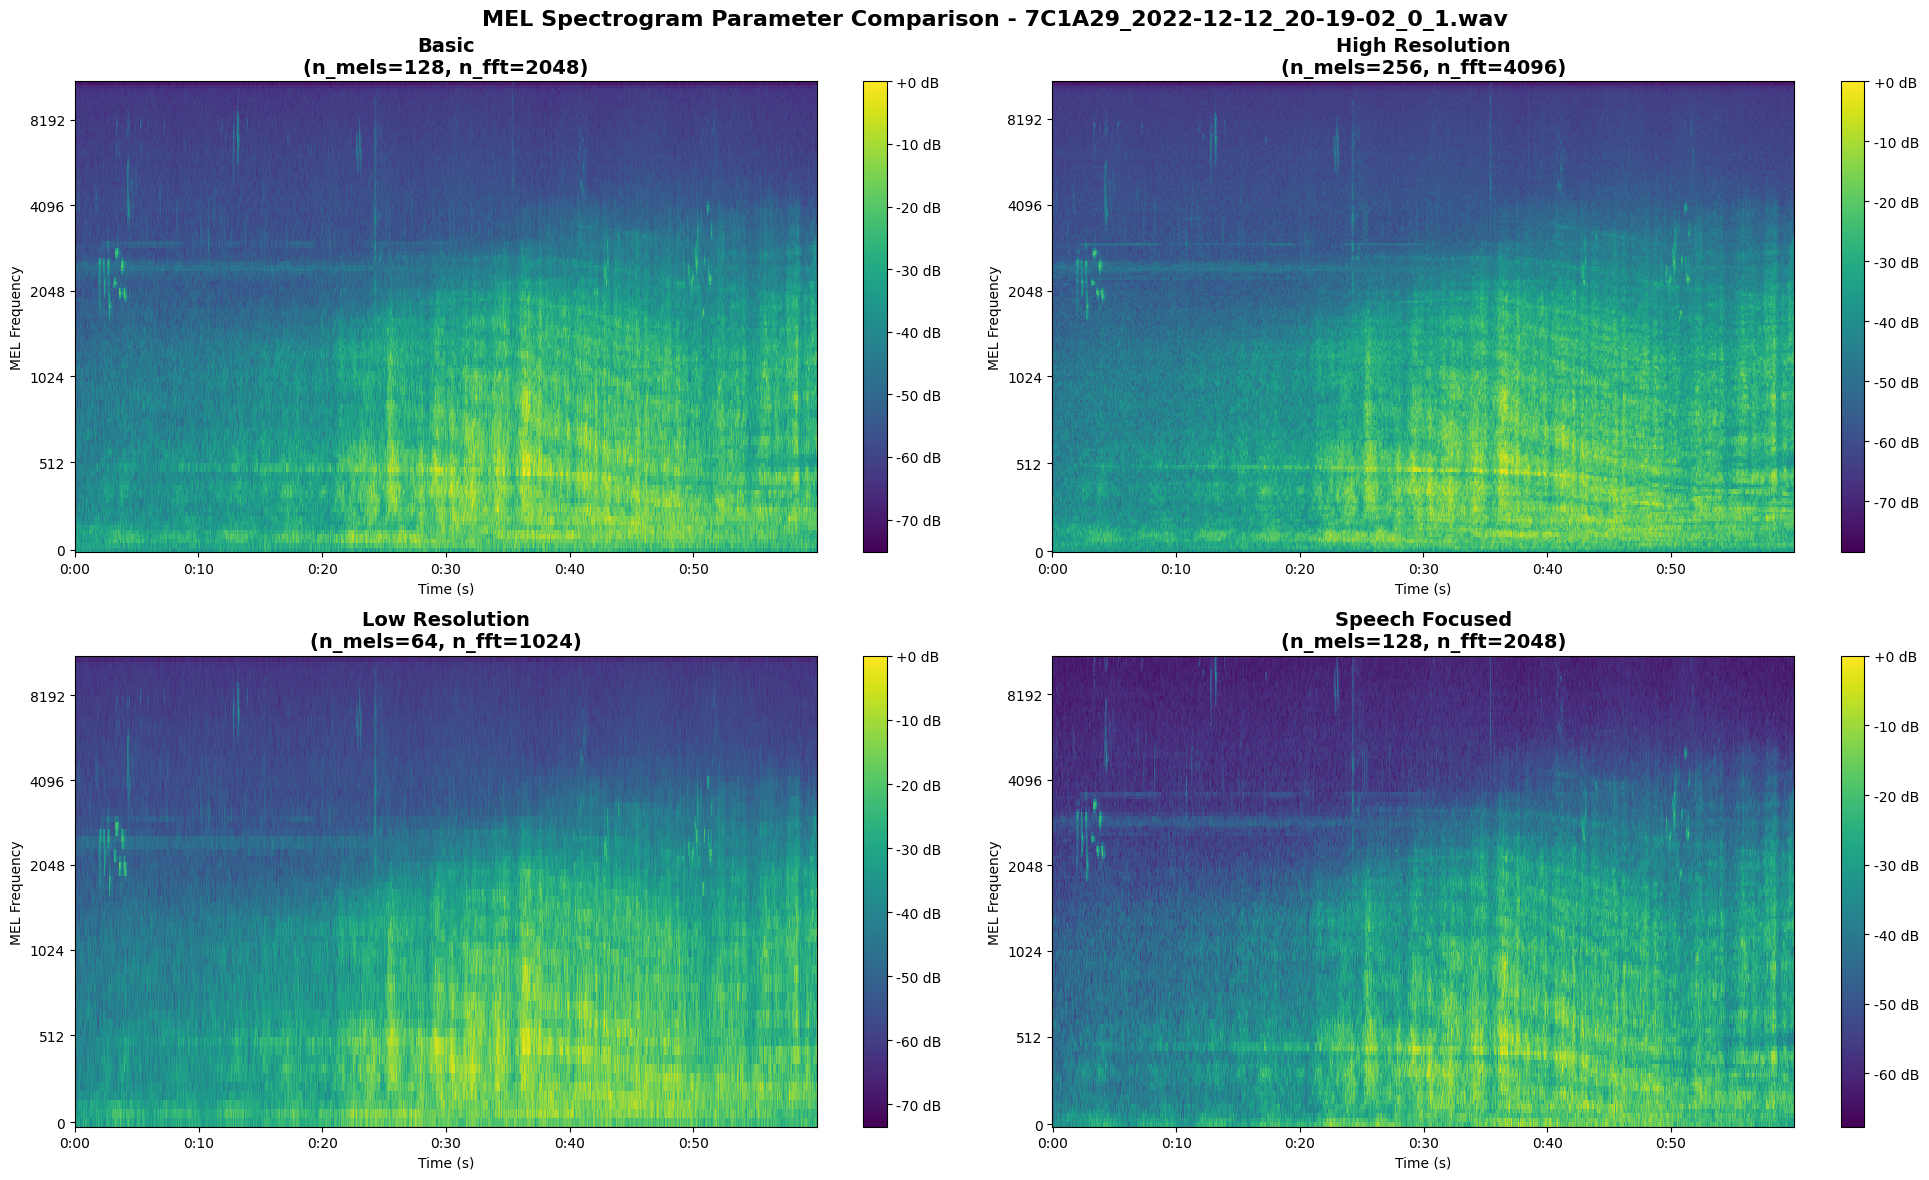

In [12]:
# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for idx, (name, spec) in enumerate(spectrograms.items()):
    img = plot_mel_spectrogram(
        spec,
        sr,
        mel_params[name]['hop_length'],
        f"{name.replace('_', ' ').title()}\n(n_mels={mel_params[name]['n_mels']}, n_fft={mel_params[name]['n_fft']})",
        axes[idx]
    )
    plt.colorbar(img, ax=axes[idx], format='%+2.0f dB')

plt.suptitle(f'MEL Spectrogram Parameter Comparison - {sample_file.name}', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

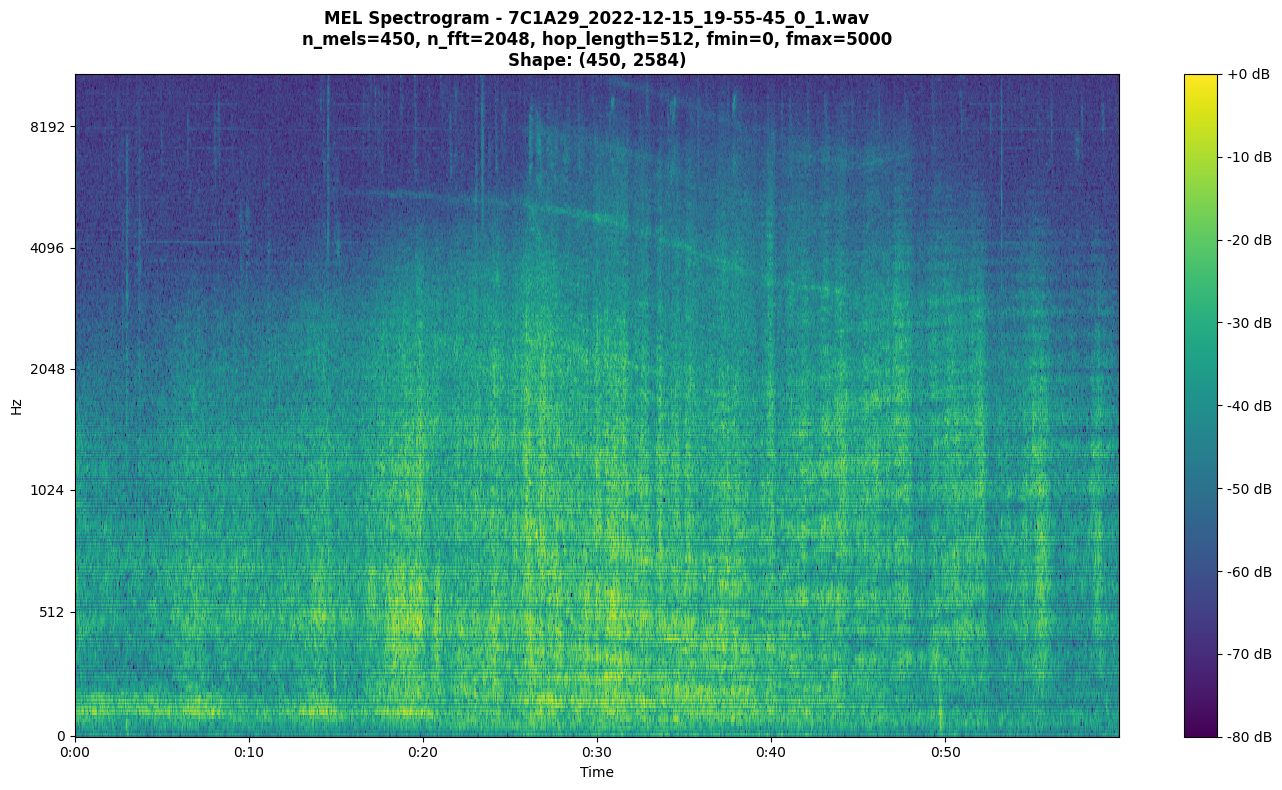

array([[-48.571915, -73.15464 , -53.39956 , ..., -41.03788 , -51.969154,
        -49.01214 ],
       [-39.204784, -63.787514, -44.03243 , ..., -31.670753, -42.602028,
        -39.64501 ],
       [-40.493153, -43.545883, -53.66217 , ..., -36.50129 , -41.580666,
        -43.585682],
       ...,
       [-67.721344, -68.85873 , -69.31961 , ..., -67.01396 , -64.66792 ,
        -69.0335  ],
       [-61.164406, -63.712204, -69.25689 , ..., -69.57259 , -70.77078 ,
        -69.52907 ],
       [-61.897995, -63.2396  , -63.967438, ..., -70.215904, -68.59613 ,
        -65.93093 ]], shape=(450, 2584), dtype=float32)

In [33]:
def explore_mel_parameters(audio_file_idx=0, n_mels=128, n_fft=2048, hop_length=512, fmin=0, fmax=8000):
    
    # Load audio file
    audio_file = AUDIO_FILES[audio_file_idx]
    y_temp, sr_temp = librosa.load(audio_file, sr=SAMPLE_RATE)
    
    # Compute MEL spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y_temp,
        sr=sr_temp,
        n_mels=n_mels,
        n_fft=n_fft,
        hop_length=hop_length,
        fmin=fmin,
        fmax=fmax if fmax > 0 else None
    )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Plot
    fig, ax = plt.subplots(figsize=(14, 8))
    img = librosa.display.specshow(
        mel_spec_db,
        sr=sr_temp,
        hop_length=hop_length,
        x_axis='time',
        y_axis='mel',
        ax=ax,
        cmap='viridis'
    )
    
    title = f"""MEL Spectrogram - {audio_file.name}
n_mels={n_mels}, n_fft={n_fft}, hop_length={hop_length}, fmin={fmin}, fmax={fmax}
Shape: {mel_spec_db.shape}"""
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    plt.colorbar(img, ax=ax, format='%+2.0f dB')
    plt.tight_layout()
    plt.show()
    
    return mel_spec_db

explore_mel_parameters(
    audio_file_idx=2,
    n_mels=450,
    n_fft=2048,
    hop_length=512,
    fmin=0,
    fmax=5000
)

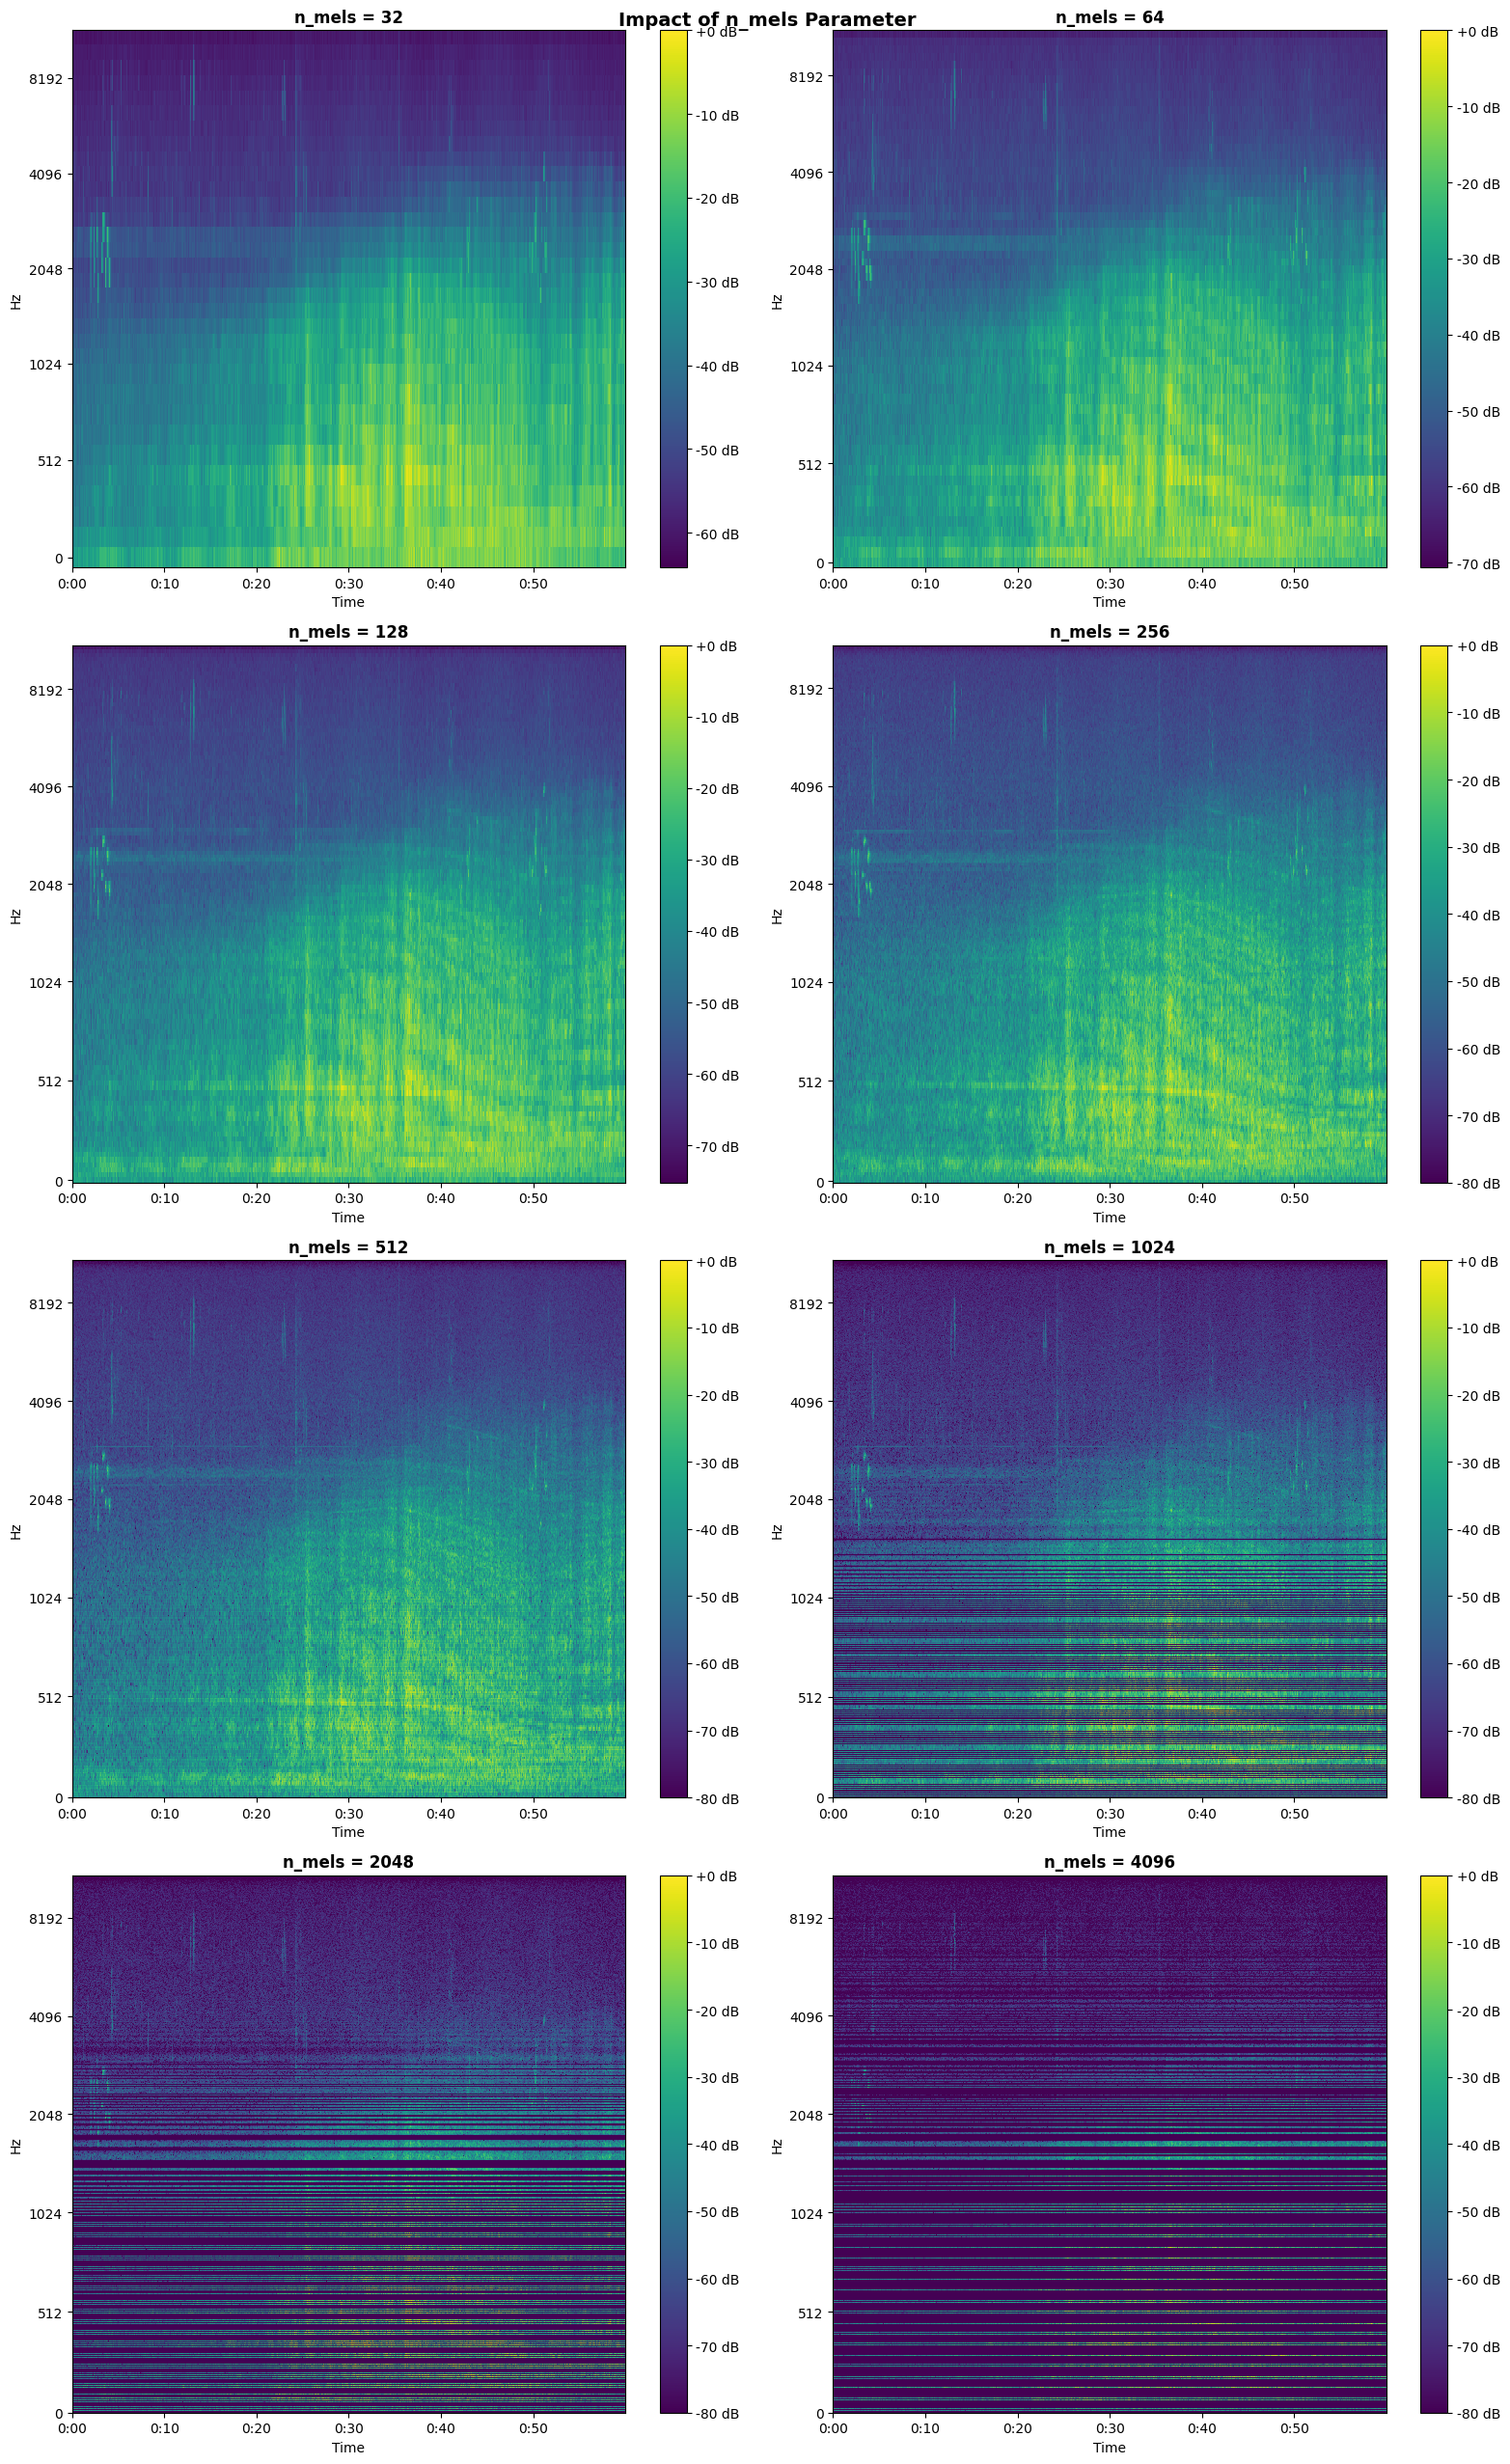

In [ ]:
def analyze_parameter_impact():
    
    # Test different n_mels values
    n_mels_values = [32, 64, 128, 256, 512, 1024, 2048, 4096]
    
    fig, axes = plt.subplots(4, 2, figsize=(16, 26))
    axes = axes.flatten()
    
    for idx, n_mels in enumerate(n_mels_values):
        mel_spec = librosa.feature.melspectrogram(
            y=y, sr=sr, n_mels=n_mels, n_fft=2048, hop_length=512
        )
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        img = librosa.display.specshow(
            mel_spec_db, sr=sr, hop_length=512,
            x_axis='time', y_axis='mel', ax=axes[idx], cmap='viridis'
        )
        axes[idx].set_title(f'n_mels = {n_mels}', fontweight='bold')
        plt.colorbar(img, ax=axes[idx], format='%+2.0f dB')
    
    plt.suptitle('Impact of n_mels Parameter', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

analyze_parameter_impact()

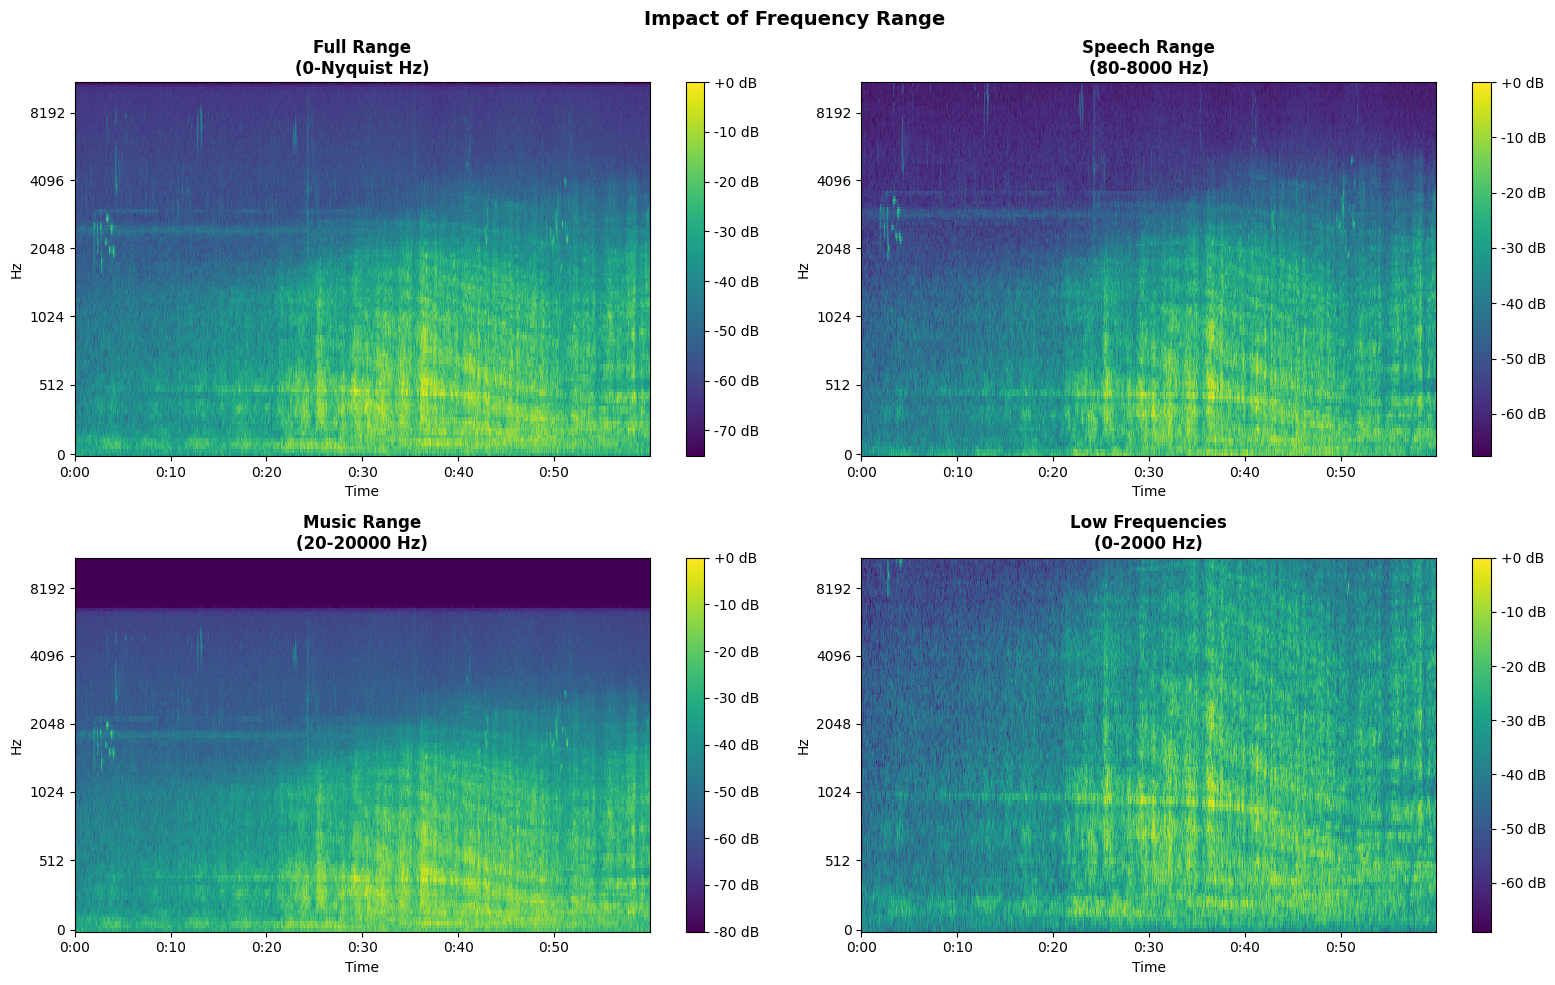

In [ ]:
def compare_frequency_ranges():
    
    freq_ranges = [
        {'name': 'Full Range', 'fmin': 0, 'fmax': None},
        {'name': 'Speech Range', 'fmin': 80, 'fmax': 8000},
        {'name': 'Music Range', 'fmin': 20, 'fmax': 20000},
        {'name': 'Low Frequencies', 'fmin': 0, 'fmax': 2000}
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, freq_range in enumerate(freq_ranges):
        mel_spec = librosa.feature.melspectrogram(
            y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=512,
            fmin=freq_range['fmin'], fmax=freq_range['fmax']
        )
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        img = librosa.display.specshow(
            mel_spec_db, sr=sr, hop_length=512,
            x_axis='time', y_axis='mel', ax=axes[idx], cmap='viridis'
        )
        
        fmax_str = freq_range['fmax'] if freq_range['fmax'] else 'Nyquist'
        axes[idx].set_title(f"{freq_range['name']}\n({freq_range['fmin']}-{fmax_str} Hz)", 
                           fontweight='bold')
        plt.colorbar(img, ax=axes[idx], format='%+2.0f dB')
    
    plt.suptitle('Impact of Frequency Range', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

compare_frequency_ranges()

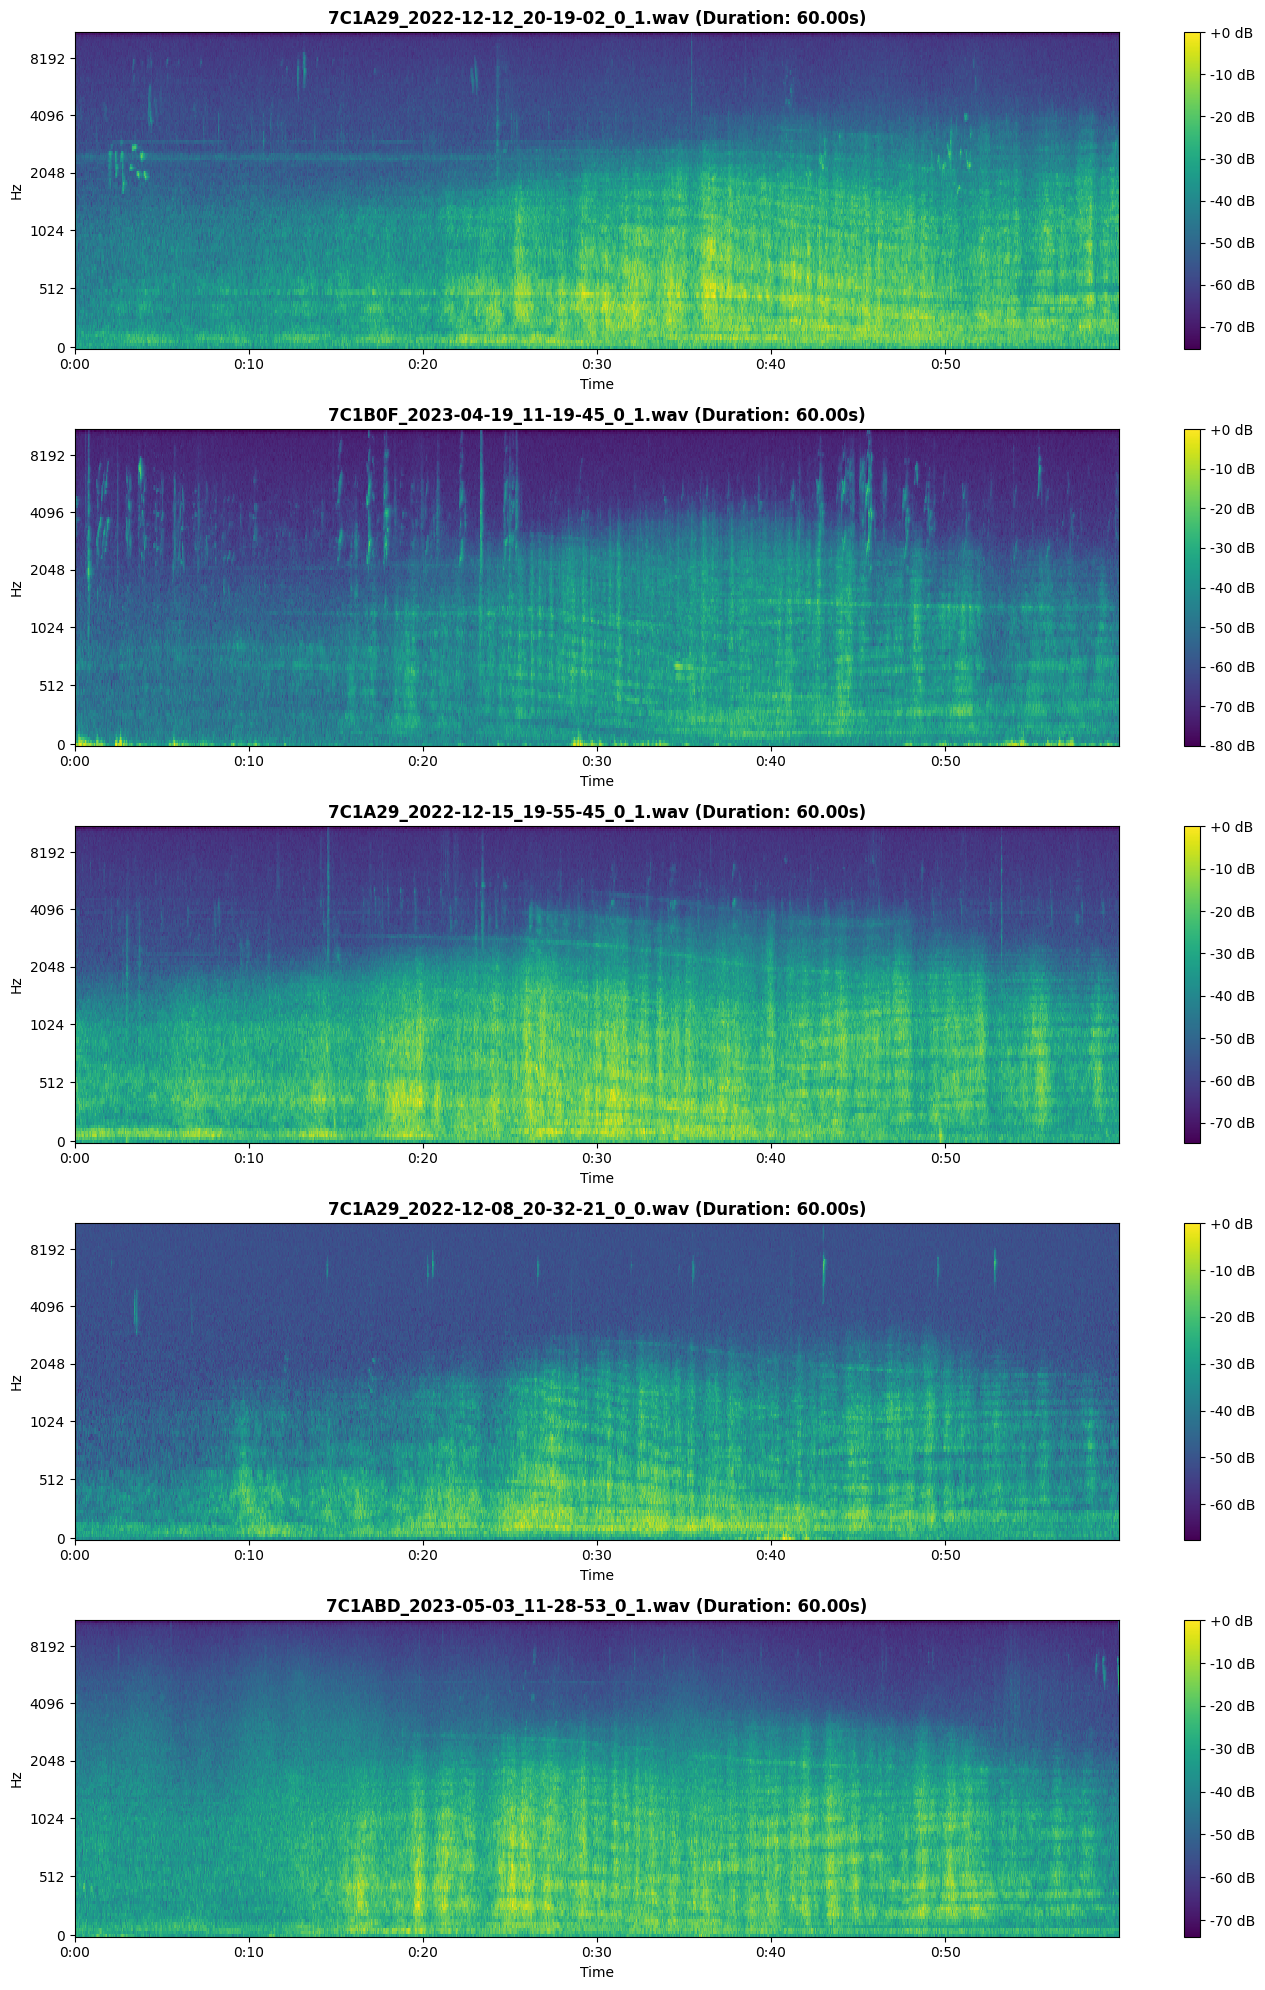

In [41]:
def compare_all_audio_files():
    """Compare MEL spectrograms across all audio files"""
    
    n_files = len(AUDIO_FILES)
    fig, axes = plt.subplots(n_files, 1, figsize=(14, 4*n_files))
    
    if n_files == 1:
        axes = [axes]
    
    for idx, audio_file in enumerate(AUDIO_FILES):
        # Load audio
        y_temp, sr_temp = librosa.load(audio_file, sr=SAMPLE_RATE)
        
        # Compute MEL spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=y_temp, sr=sr_temp, n_mels=128, n_fft=2048, hop_length=512
        )
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        # Plot
        img = librosa.display.specshow(
            mel_spec_db, sr=sr_temp, hop_length=512,
            x_axis='time', y_axis='mel', ax=axes[idx], cmap='viridis'
        )
        
        axes[idx].set_title(f'{audio_file.name} (Duration: {len(y_temp)/sr_temp:.2f}s)', 
                           fontweight='bold')
        plt.colorbar(img, ax=axes[idx], format='%+2.0f dB')
    
    plt.tight_layout()
    plt.show()

compare_all_audio_files()